Copy from 2PCF_TNG300-z2_11-3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
import Corrfunc
from Corrfunc.theory.xi import xi
from Corrfunc.theory.DD import DD

In [2]:
bhmasses_5 = np.load('bhmasses-5_TNG300_z1.npy')
bhars_5 = np.load('bhars-5_TNG300_z1.npy')
positions_5 = np.load('positions-5_TNG300_z1.npy')
stmasses_sub = np.load('stmasses-sub_TNG300_z1.npy')
sfrs_sub = np.load('sfrs-sub_TNG300_z1.npy')
positions_sub = np.load('positions-sub_TNG300_z1.npy')

In [3]:
Edd_coeff = ((4 * np.pi * const.G * const.m_p * u.Msun) / (0.1 * const.sigma_T * const.c)).to(u.Msun/u.yr).value
fEdd_5 = bhars_5 / (Edd_coeff * bhmasses_5)

In [4]:
box_size = 205
n_threads = 1

.--------------------.

In [5]:
r_edges = np.linspace(1, 25, 50)
r_avg = (3/4) * (r_edges[1:]**4 - r_edges[:-1]**4) / (r_edges[1:]**3 - r_edges[:-1]**3)

In [6]:
def load_qq(bhmass_min, fEdd_min):
    mask_q = (bhmasses_5 > bhmass_min) & (fEdd_5 > fEdd_min)
    Xq = positions_5[mask_q][:,0] / 1000
    Yq = positions_5[mask_q][:,1] / 1000
    Zq = positions_5[mask_q][:,2] / 1000
    
    results_qq = xi(box_size, n_threads, r_edges, Xq, Yq, Zq)
    xiqq = results_qq['xi']

    return xiqq

def load_gg(stmass_min):
    mask_g = (stmasses_sub > stmass_min)
    Xg = positions_sub[mask_g][:,0] / 1000
    Yg = positions_sub[mask_g][:,1] / 1000
    Zg = positions_sub[mask_g][:,2] / 1000

    results_gg = xi(box_size, n_threads, r_edges, Xg, Yg, Zg)
    xigg = results_gg['xi']

    return xigg

In [7]:
bhmass_min_list = [1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e9]
fEdd_min_list = [0.01, 0.05, 0.1, 0.01, 0.05, 0.1, 1e-4]
stmass_min_list = [1e10, 1e11, 10**(11.5), 1e12]

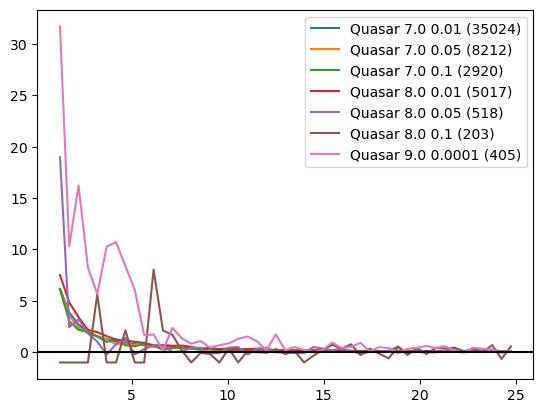

In [8]:
for i in range(7):
    count = np.sum((bhmasses_5 > bhmass_min_list[i]) & (fEdd_5 > fEdd_min_list[i]))
    plt.plot(r_avg, load_qq(bhmass_min_list[i], fEdd_min_list[i]), \
             label=f'Quasar {np.log10(bhmass_min_list[i])} {fEdd_min_list[i]} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

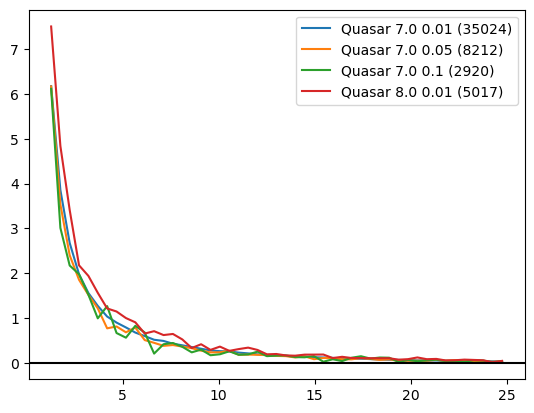

In [9]:
for i in range(4):
    count = np.sum((bhmasses_5 > bhmass_min_list[i]) & (fEdd_5 > fEdd_min_list[i]))
    plt.plot(r_avg, load_qq(bhmass_min_list[i], fEdd_min_list[i]), \
             label=f'Quasar {np.log10(bhmass_min_list[i])} {fEdd_min_list[i]} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

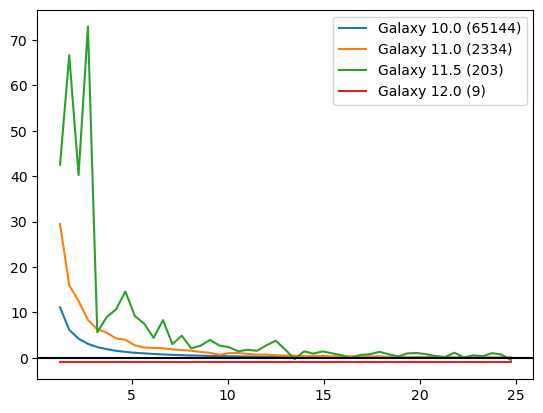

In [10]:
for i in range(4):
    count = np.sum(stmasses_sub > stmass_min_list[i])
    plt.plot(r_avg, load_gg(stmass_min_list[i]), \
             label=f'Galaxy {np.log10(stmass_min_list[i])} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

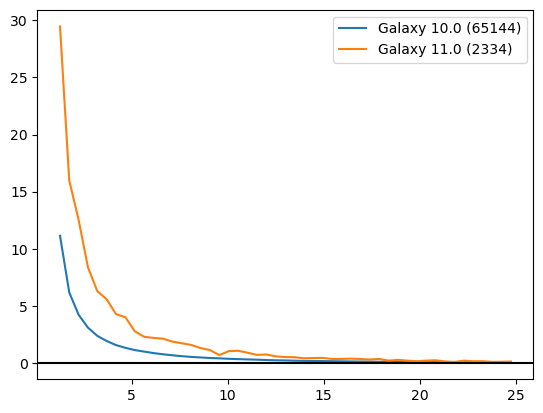

In [11]:
for i in range(2):
    count = np.sum(stmasses_sub > stmass_min_list[i])
    plt.plot(r_avg, load_gg(stmass_min_list[i]), \
             label=f'Galaxy {np.log10(stmass_min_list[i])} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

In [12]:
bhmass_min_list = [1e7, 1e7, 1e7, 1e8]
fEdd_min_list = [0.01, 0.05, 0.1, 0.01]
stmass_min_list = [1e10, 10**(10.5), 1e11]

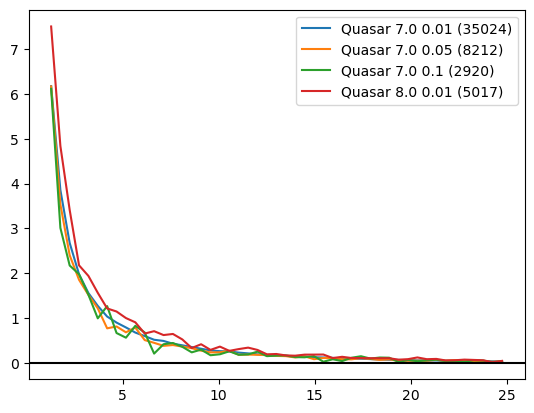

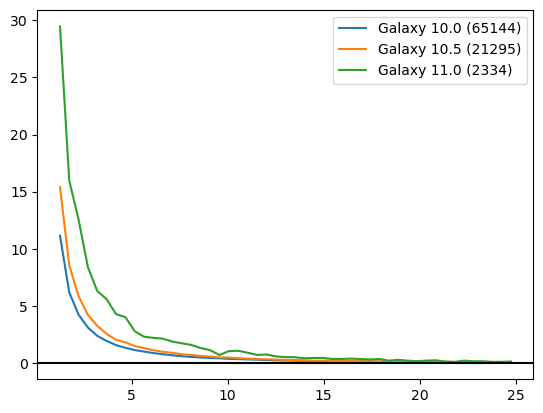

In [13]:
for i in range(len(bhmass_min_list)):
    count = np.sum((bhmasses_5 > bhmass_min_list[i]) & (fEdd_5 > fEdd_min_list[i]))
    plt.plot(r_avg, load_qq(bhmass_min_list[i], fEdd_min_list[i]), \
             label=f'Quasar {np.log10(bhmass_min_list[i])} {fEdd_min_list[i]} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

for i in range(len(stmass_min_list)):
    count = np.sum(stmasses_sub > stmass_min_list[i])
    plt.plot(r_avg, load_gg(stmass_min_list[i]), \
             label=f'Galaxy {np.log10(stmass_min_list[i])} ({count})')
plt.axhline(0, color='black')
plt.legend()
plt.show()

In [14]:
dtype = np.float64
box_size = np.float64(205)

r_edges = np.linspace(1, 25, 50).astype(dtype)
r_avg = (3/4) * (r_edges[1:]**4 - r_edges[:-1]**4) / (r_edges[1:]**3 - r_edges[:-1]**3)
r_avg = r_avg.astype(dtype)

In [15]:
def ratio(bhmass_min, fEdd_min, stmass_min):
    
    mask_q = (bhmasses_5 > bhmass_min) & (fEdd_5 > fEdd_min)
    mask_g = (stmasses_sub > stmass_min)
    
    Xq = np.ascontiguousarray(positions_5[mask_q][:,0] / 1000, dtype)
    Yq = np.ascontiguousarray(positions_5[mask_q][:,1] / 1000, dtype)
    Zq = np.ascontiguousarray(positions_5[mask_q][:,2] / 1000, dtype)
    Xg = np.ascontiguousarray(positions_sub[mask_g][:,0] / 1000, dtype)
    Yg = np.ascontiguousarray(positions_sub[mask_g][:,1] / 1000, dtype)
    Zg = np.ascontiguousarray(positions_sub[mask_g][:,2] / 1000, dtype)

    results_qq = xi(box_size, n_threads, r_edges, Xq, Yq, Zq)
    results_gg = xi(box_size, n_threads, r_edges, Xg, Yg, Zg)
    xiqq = results_qq['xi']
    xigg = results_gg['xi']
    DDqq = results_qq['npairs']/2
    DDgg = results_gg['npairs']/2

    results_qg = DD(autocorr=False, nthreads=1, binfile=r_edges, \
                X1=Xq, Y1=Yq, Z1=Zq, X2=Xg, Y2=Yg, Z2=Zg, \
                periodic=True, boxsize=box_size)
    DDqg = results_qg['npairs']
    Nq = len(Xq)
    Ng = len(Xg)
    Vbox = box_size**3
    Vshell = (4/3) * np.pi * (r_edges[1:]**3 - r_edges[:-1]**3)
    RRqg = Nq * Ng * Vshell / Vbox
    xiqg = DDqg/RRqg - 1

    R_auto = np.sqrt(xiqq/xigg)
    R_cross = xiqg/xigg

    sigmaqq = (1 + xiqq) / np.sqrt(DDqq)
    sigmagg = (1 + xigg) / np.sqrt(DDgg)
    sigmaqg = (1 + xiqg) / np.sqrt(DDqg)
    sigmaR_auto = 0.5 * R_auto * np.sqrt((sigmaqq/xiqq)**2 + (sigmagg/xigg)**2)
    sigmaR_cross = R_cross * np.sqrt((sigmaqg/xiqg)**2 + (sigmagg/xigg)**2)
    
    c_auto, cov_auto = np.polyfit(r_avg, R_auto, 0, w=1/sigmaR_auto, cov=True)
    c_err_auto = np.sqrt(cov_auto)
    
    c_cross, cov_cross = np.polyfit(r_avg, R_cross, 0, w=1/sigmaR_cross, cov=True)
    c_err_cross = np.sqrt(cov_cross)

    print(f'Auto: {np.round(c_auto[0],3)}, err {np.round(c_err_auto[0][0],3)}')
    print(f'Cross: {np.round(c_cross[0],3)}, err {np.round(c_err_cross[0][0],3)}')

    plt.errorbar(r_avg, R_auto, yerr=sigmaR_auto, color='tab:blue', alpha=0.5, label='Auto')
    plt.axhline(c_auto, color='tab:blue', ls='dashed')
    plt.errorbar(r_avg, R_cross, yerr=sigmaR_cross, color='tab:orange', alpha=0.5, label='Cross')
    plt.axhline(c_cross, color='tab:orange', ls='dashed')
    plt.legend()
    plt.show()

Auto: 0.831, err 0.005
Cross: 0.822, err 0.006


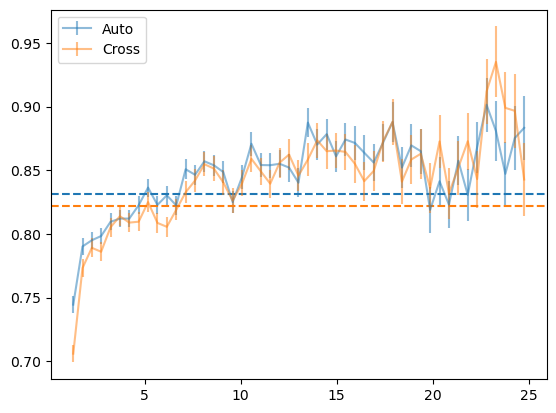

In [16]:
ratio(1e7, 0.01, 1e10)

Auto: 0.798, err 0.008
Cross: 0.775, err 0.007


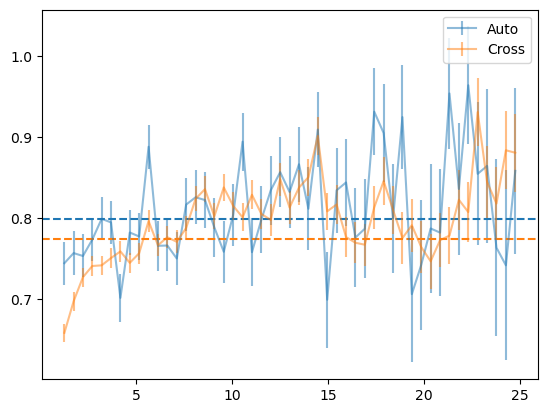

In [17]:
ratio(1e7, 0.05, 1e10)

Auto: 0.809, err 0.016
Cross: 0.769, err 0.008


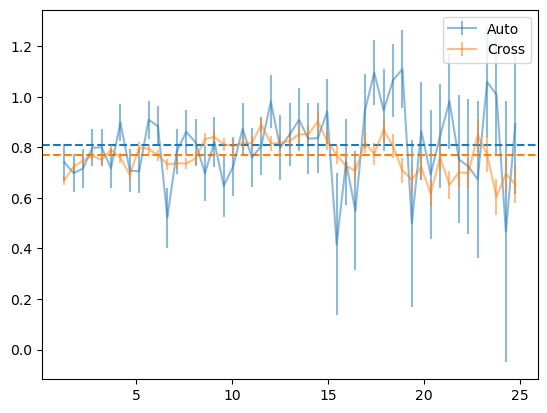

In [18]:
ratio(1e7, 0.1, 1e10)

Auto: 0.941, err 0.011
Cross: 0.925, err 0.008


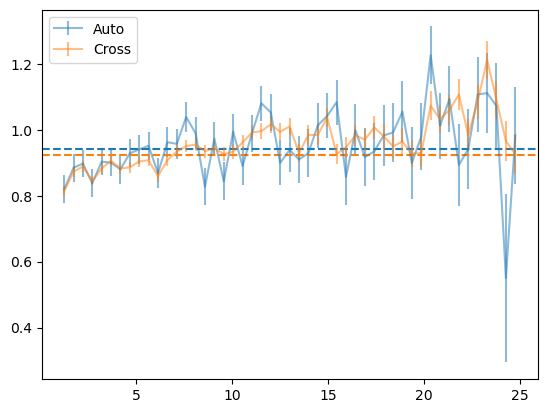

In [19]:
ratio(1e8, 0.01, 1e10)

 ** On entry to DLASCL parameter number  4 had an illegal value
Auto: 0.729, err 0.006
Cross: 0.716, err 0.008


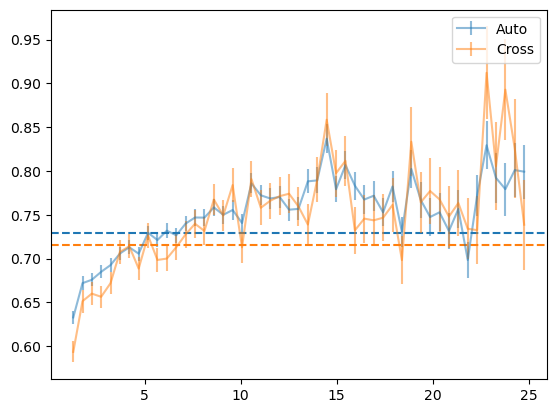

In [21]:
ratio(1e7, 0.01, 10**(10.5))

Auto: 0.7, err 0.008
Cross: 0.668, err 0.01


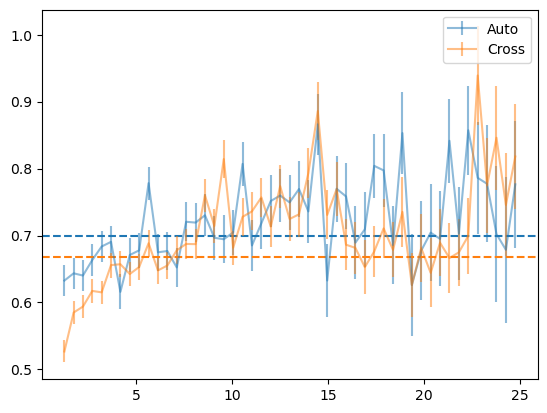

In [22]:
ratio(1e7, 0.05, 10**(10.5))

Auto: 0.709, err 0.015
Cross: 0.659, err 0.011


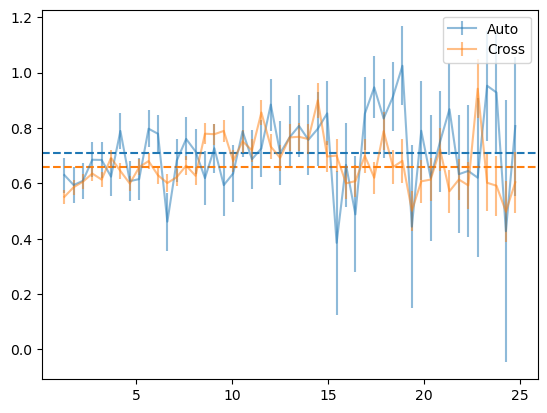

In [23]:
ratio(1e7, 0.1, 10**(10.5))

Auto: 0.825, err 0.011
Cross: 0.808, err 0.01


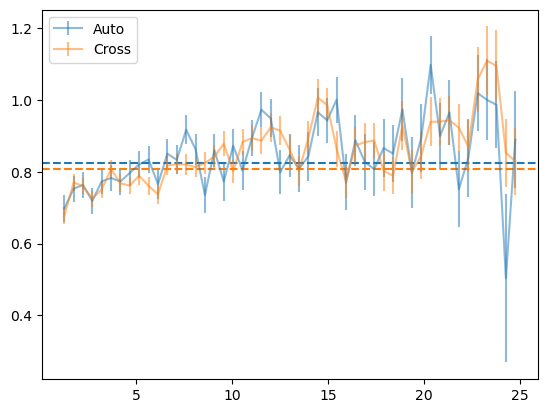

In [24]:
ratio(1e8, 0.01, 10**(10.5))

Auto: 0.511, err 0.005
Cross: 0.474, err 0.008


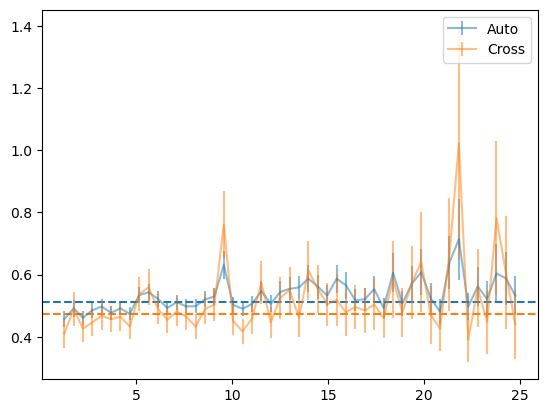

In [25]:
ratio(1e7, 0.01, 1e11)

Auto: 0.487, err 0.006
Cross: 0.432, err 0.009


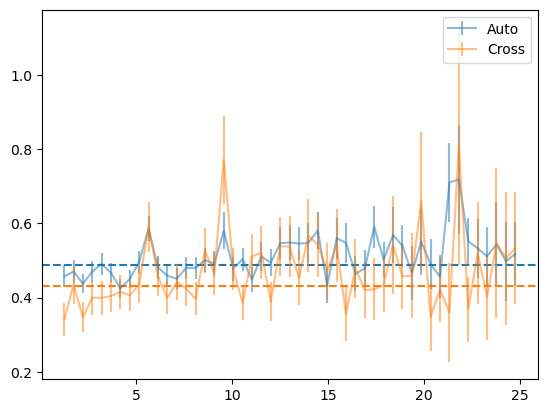

In [26]:
ratio(1e7, 0.05, 1e11)

Auto: 0.492, err 0.011
Cross: 0.406, err 0.013


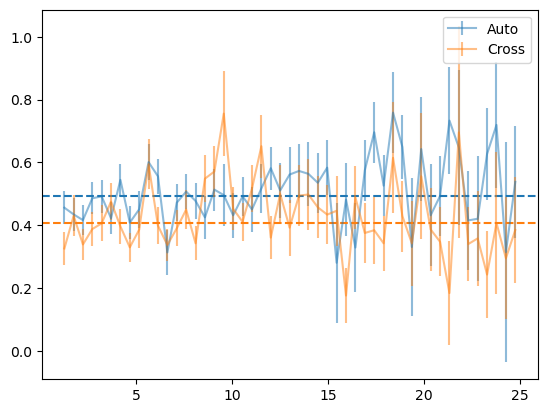

In [27]:
ratio(1e7, 0.1, 1e11)

Auto: 0.574, err 0.008
Cross: 0.535, err 0.011


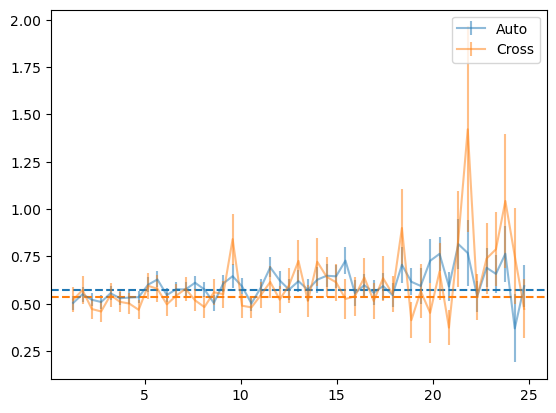

In [28]:
ratio(1e8, 0.01, 1e11)